In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install doi2bib

Processing /home/faculty/.cache/pip/wheels/f6/8d/fd/7718be9a0ad5cd45e904981c6f1e625083204ad5c860d2980d/doi2bib-0.3.0-py3-none-any.whl
Processing /home/faculty/.cache/pip/wheels/ec/fb/46/7db6de3731f9a9f0c65a298cd67956f6a99b34864c1dc394b3/bibtexparser-1.1.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bibtexparser

Note: you may need to restart the kernel to use updated packages.


In [4]:
import networkx as nx
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community
import collections
from collections import Counter
import pandas as pd
import numpy as np
import codecs

import os
import ctypes
import time
from matplotlib import pyplot as plt
from itertools import combinations
import bibtexparser

In [5]:
pd.options.display.max_columns = None

# Co-Authorship Network

In [6]:
#import cleaned dataset
#%%time
df = pd.read_csv('combined_WoS')
print('rows:',len(df))

rows: 4722


In [7]:
# Set DOI to list from cleaned dataset
DOI_list = df['AR'].values.tolist()

In [8]:
#Save Doi_list as text file for co_authors
#with open('DOI_list_t=full.txt', 'w') as f:
#    for item in DOI_list:
#        f.write("%s\n" % item)

### Import DOi2bib dataset (created on mac terminal)

In [9]:
#Terminal Faculty Code:
#doi2bib --input DOI_list_t=full.txt --output NETWORK_Co_author.bib

In [10]:
with open('NETWORK_Co_author.bib') as bibtex_file:
    bibtex_str = bibtex_file.read()

bib_database = bibtexparser.loads(bibtex_str)

In [11]:
df_bib = pd.DataFrame(bib_database.entries)
#pd.io.json.json_normalize(bib_database.entries)

In [12]:
#df.info()

In [13]:
print(df_bib.shape)
df_bib.head()

(3549, 15)


,journal,title,author,pages,number,volume,publisher,month,year,url,doi,ENTRYTYPE,ID,booktitle,editor
0,{IEEE} Transactions on Aerospace and Electroni...,Data-Driven Testbed for Evaluating {GPS} Carri...,Todd E. Humph and Mark L. Psiaki and Brent M. ...,1609--1623,4,46,Institute of Electrical and Electronics Engine...,oct,2010,https://doi.org/10.1109%2Ftaes.2010.5595582,10.1109/taes.2010.5595582,article,Humph_2010,NaN,NaN
1,Energy {\&} Fuels,Energy Efficiency of Conventionally-Heated Pil...,Darryl R. Godwin and Simon J. Lawton and Jonat...,5446--5453,10,24,American Chemical Society ({ACS}),oct,2010,https://doi.org/10.1021%2Fef100972f,10.1021/ef100972f,article,Godwin_2010,NaN,NaN
2,Fuel,High energy syngas production by waste tyres s...,A. Donatelli and P. Iovane and A. Molino,2721--2728,10,89,Elsevier {BV},oct,2010,https://doi.org/10.1016%2Fj.fuel.2010.03.040,10.1016/j.fuel.2010.03.040,article,Donatelli_2010,NaN,NaN
3,Fuel,Sorbent attrition in a carbonation/calcination...,Bel{\'{e}}n Gonz{\'{a}}lez and M{\'{o}}nica Al...,2918--2924,10,89,Elsevier {BV},oct,2010,https://doi.org/10.1016%2Fj.fuel.2010.01.019,10.1016/j.fuel.2010.01.019,article,Gonz_lez_2010,NaN,NaN
4,Innovative Food Science {\&} Emerging Technolo...,Progressive freeze concentration of orange jui...,J. S{\'{a}}nchez and Y. Ruiz and M. Ravent{\'{...,644--651,4,11,Elsevier {BV},oct,2010,https://doi.org/10.1016%2Fj.ifset.2010.06.006,10.1016/j.ifset.2010.06.006,article,S_nchez_2010,NaN,NaN


In [14]:
df = df_bib[["doi","author","year"]]
df = df.rename(columns={"doi": "DOI"})
df = df.dropna()
#df = df.set_index('DOI')

df.head()

,DOI,author,year
0,10.1109/taes.2010.5595582,Todd E. Humph and Mark L. Psiaki and Brent M. ...,2010
1,10.1021/ef100972f,Darryl R. Godwin and Simon J. Lawton and Jonat...,2010
2,10.1016/j.fuel.2010.03.040,A. Donatelli and P. Iovane and A. Molino,2010
3,10.1016/j.fuel.2010.01.019,Bel{\'{e}}n Gonz{\'{a}}lez and M{\'{o}}nica Al...,2010
4,10.1016/j.ifset.2010.06.006,J. S{\'{a}}nchez and Y. Ruiz and M. Ravent{\'{...,2010


In [15]:
df.to_csv('SUPPORT_Co-Author_t=full.csv', index=False)

In [17]:
########################################################################
#from here onwards only Aninas code - not used so far
########################################################################

In [16]:
result = pd.merge(data, df, left_index=True, right_index=True)
result = result.drop(['Authors'], axis=1)
result.head()

,year_published_bin,author
DOI,,
10.1002/bmc.3867,3.0,Qiang Ren and Lin Ding and Shan-shan Sun and H...
10.1002/hup.2216,2.0,J. Sarris and A. Scholey and I. Schweitzer and...
10.1002/jbt.22328,3.0,Nurhan Sahin and Cemal Orhan and Fusun Erten a...
10.1002/jcb.28535,3.0,Lingyuan Xu and Guikun Huang and Xiaobao Guo a...
10.1002/jcp.28177,3.0,Mehran Pashirzad and Mojtaba Shafiee and Amir ...


In [17]:
df = result

In [18]:
#Autoren sind mit "and" getrennt
df.head(2)

,year_published_bin,author
DOI,,
10.1002/bmc.3867,3.0,Qiang Ren and Lin Ding and Shan-shan Sun and H...
10.1002/hup.2216,2.0,J. Sarris and A. Scholey and I. Schweitzer and...


In [19]:
df.to_csv('Author_names.csv', index=True)

In [20]:
def create_co_authorship_network(df,time_bin):
    df = df
    y = time_bin
    df = df[df['year_published_bin']==y]
    df_authors = df['author'].str.split(' and ', 10000, expand=True)
    df_authors = df_authors.replace( np.nan, np.nan )
    
    #df_authors[df_authors.columns] = df_authors.apply(lambda x: x.str.strip())
    #df_authors[df_authors.columns] = df_authors.apply(lambda x: x.str.lower())


    df_authors['combinations'] = df_authors.apply(lambda r: list(combinations(r, 2)), axis=1)
    count_row = df_authors.shape[0]-1
    dataframe = pd.DataFrame([])
    
    for i in range(count_row):#  (4681)
        df = df_authors.combinations.iloc[i]
        df = pd.DataFrame(df)
        df = df.dropna()
        dataframe = dataframe.append(df, ignore_index=True) #dataframe = 
        
    df_co_authors = dataframe
    df_co_authors.columns =['Author', 'Co'] 
    return df_co_authors

In [21]:
#Temporal co-authorship data 1989-1999
data_t1 = create_co_authorship_network(df,1)
#Temporal co-authorship data 2000-2009
data_t2 = create_co_authorship_network(df,2)
#Temporal co-authorship data 2010-2019
data_t3 = create_co_authorship_network(df,3)

In [22]:
data_t1.head()

,Author,Co
0,Li Shun-xing,Zheng Feng-ying
1,Li Shun-xing,Liu Xian-li
2,Li Shun-xing,Cai Wen-lian
3,Zheng Feng-ying,Liu Xian-li
4,Zheng Feng-ying,Cai Wen-lian


In [23]:
data_t1.shape

(12018, 2)

In [24]:
data_t2.shape

(20434, 2)

In [25]:
data_t3.shape

(38784, 2)

### Create Text files for MuxViz

In [26]:
# Data T1 to txt
#data_t1.to_csv('MuxViz/Co_Author_t1.txt', header=False, index=False, sep='\t', mode='a')

In [27]:
#data_t1.to_csv('MuxViz/Co_Author_t1.csv', header=True, index=False)

In [22]:
#Create First step layout file
df_co = data_t1.append(data_t2, ignore_index=True)
df_co = df_co.append(data_t3, ignore_index=True)
df_co.shape

(71236, 2)

In [ ]:
#df_co.to_csv('MuxViz/Author_Names', header=True, index=False)

In [ ]:
#data_t3.to_csv('Networks/co_author_t3.csv', index=False)

In [23]:
df_co.head()

,Author,Co
0,Li Shun-xing,Zheng Feng-ying
1,Li Shun-xing,Liu Xian-li
2,Li Shun-xing,Cai Wen-lian
3,Zheng Feng-ying,Liu Xian-li
4,Zheng Feng-ying,Cai Wen-lian


### Create Paper to Author Dataframe

In [24]:
df = df.reset_index()

In [41]:
def paper2author_3(df,time_bin):
    df = df
    y = time_bin
    df = df[df['year_published_bin']==y]
    df_authors = df['author'].str.split(' and ', 40, expand=True)
    df_authors = df_authors.replace( np.nan, np.nan )
    df_authors.head()
    
    df_authors = df_authors.rename(columns={20: "twenty"})
    df_authors = df_authors.replace(np.nan,"titte", regex=True)
    df_authors = df_authors[df_authors["twenty"].str.contains("titte")]
    df_authors = df_authors.replace({'titte': np.nan})
    
    x = pd.merge(df["DOI"],df_authors,left_index=True, right_index=True)
    x = x.melt(id_vars = ['DOI'], value_name = "Author") \
        .drop("variable", axis = 1) \
        .dropna()
    
    return x
    
    


In [42]:
def paper2author1_2(df,time_bin):
    df = df
    y = time_bin
    df = df[df['year_published_bin']==y]
    df_authors = df['author'].str.split(' and ', 40, expand=True)
    df_authors = df_authors.replace( np.nan, np.nan )
    df_authors.head()
    

    
    x = pd.merge(df["DOI"],df_authors,left_index=True, right_index=True)
    x = x.melt(id_vars = ['DOI'], value_name = "Author") \
        .drop("variable", axis = 1) \
        .dropna()
    
    return x
    
    

In [59]:
p2a_1 = paper2author1_2(df,1)

In [50]:
p2a_2 = paper2author1_2(df,2)

In [45]:
p2a_3 = paper2author_3(df,3)

In [64]:
#create Doi to Author DF in MuxViz Format
def Paper_Author_Mux(df):
    df['layer1'] = 1
    df['layer2'] = 2
    df = df[['DOI', 'layer1', 'Author', 'layer2']]
    df.rename(columns={'DOI':'From','Author':'To'}, inplace=True)
    df.To = df.To.str.strip()
    df.From = df.From.str.strip()
    return df

In [60]:
p2a_1 = Paper_Author_Mux(p2a_1)

In [62]:
p2a_1.shape

(4452, 4)

In [63]:
p2a_1.head(2)

,From,layer1,To,layer2
0,10.1002/pca.858,1,Li Shun-xing,2
1,10.1002/ptr.1719,1,David R. Katerere,2


In [53]:
p2a_2 = Paper_Author_Mux(p2a_2)

In [55]:
p2a_2.shape

(6261, 4)

In [56]:
p2a_3 = Paper_Author_Mux(p2a_3)

In [58]:
p2a_3.shape

(9749, 4)

## Create Author to Author Dataframe

In [65]:
data_t1.head(1)

,Author,Co
0,Li Shun-xing,Zheng Feng-ying


In [102]:
def Author_Author_Mux(df):
    df['layer1'] = 2
    df['layer2'] = 2
    df = df[['Author', 'layer1', 'Co', 'layer2']]
    df.rename(columns={'Author':'From',
                          'Co':'To'}, 
                 inplace=True)
    df.To = df.To.str.strip()
    df.From = df.From.str.strip()   
    return df

In [107]:
a2a_1 = Author_Author_Mux(data_t1)
df_t1.shape

(43562, 5)

In [108]:
a2a_1.head(1)

,From,layer1,To,layer2
0,Li Shun-xing,2,Zheng Feng-ying,2


In [109]:
a2a_2 = Author_Author_Mux(data_t2)
a2a_2.shape

(20434, 4)

In [110]:
a2a_3 = Author_Author_Mux(data_t3)
a2a_3.shape

(38784, 4)

## Create Paper to Paper Dataframe

In [87]:
#Load Paper to Paper
p2p_1 = pd.read_csv('MuxViz/Paper2PaperCSV/Paper2Paper_t1.csv')
p2p_1.shape

(326, 2)

In [88]:
p2p_2 = pd.read_csv('MuxViz/Paper2PaperCSV/Paper2Paper_t2.csv')
p2p_2.shape

(893, 2)

In [89]:
p2p_3 = pd.read_csv('MuxViz/Paper2PaperCSV/Paper2Paper_t3.csv')
p2p_3.shape

(1118, 2)

In [80]:
p2p_1.head(1)

,DOI,PAPER_REFERENCE_DOI
0,10.1016/j.phymed.2010.07.006,10.1016/j.phymed.2003.11.007


In [90]:
def Paper_Paper_Mux(df):
    df['layer1'] = 1
    df['layer2'] = 1
    df = df[['DOI', 'layer1', 'PAPER_REFERENCE_DOI', 'layer2']]
    df.rename(columns={'DOI':'From',
                          'PAPER_REFERENCE_DOI':'To'}, 
                 inplace=True)
    df.To = df.To.str.strip()
    df.From = df.From.str.strip()   
    return df

In [91]:
p2p_1 = Paper_Paper_Mux(p2p_1)
p2p_2 = Paper_Paper_Mux(p2p_2)
p2p_3 = Paper_Paper_Mux(p2p_3)

In [ ]:
##Create First step layout file
df_layers = p2p_1.append(data_t1, ignore_index=True)
df_layers = df_layers.append(p2a_1, ignore_index=True)
df_layers.From = df_layers.From.str.strip()
df_layers.To = df_layers.To.str.strip()
df_layers["Weight"]=1

## Create Muxiz Edgelists per Timeframe

#### T1

In [97]:
##Create First step layout file for Timeframe 1
df_t1 = p2p_1.append(a2a_1, ignore_index=True)
df_t1 = df_t1.append(p2a_1, ignore_index=True)
df_t1.From = df_t1.From.str.strip()
df_t1.To = df_t1.To.str.strip()
df_t1["Weight"]=1

In [99]:
df_t1.head(1)

,From,layer1,To,layer2,Weight
0,10.1016/j.phymed.2010.07.006,1,10.1016/j.phymed.2003.11.007,1,1


In [100]:
df_t1.shape

(43562, 5)

#### T2

In [112]:
##Create First step layout file for Timeframe 1
df_t2 = p2p_2.append(a2a_2, ignore_index=True)
df_t2 = df_t2.append(p2a_2, ignore_index=True)
df_t2.From = df_t2.From.str.strip()
df_t2.To = df_t2.To.str.strip()
df_t2["Weight"]=1
df_t2.head(1)

,From,layer1,To,layer2,Weight
0,10.1016/S0944-7113(98)80060-3,1,10.1016/S0944-7113(11)80059-0,1,1


#### T3

In [113]:
##Create First step layout file for Timeframe 1
df_t3 = p2p_3.append(a2a_3, ignore_index=True)
df_t3 = df_t3.append(p2a_3, ignore_index=True)
df_t3.From = df_t3.From.str.strip()
df_t3.To = df_t3.To.str.strip()
df_t3["Weight"]=1
df_t3.head(1)

,From,layer1,To,layer2,Weight
0,10.4193/Rhin19.089,1,10.1007/s12325-012-0014-z,1,1


### Create Biblio

In [64]:
df_1 = p2a_1
df_2 = p2a_2
df_

,From,layer1,To,layer2
0,10.1002/pca.858,1,Li Shun-xing,2
1,10.1002/ptr.1719,1,David R. Katerere,2
2,10.1002/ptr.1923,1,Jorge Alonso,2
3,10.1007/s00210-007-0175-5,1,Stefania Marzocco,2
4,10.1007/s00228-005-0050-6,1,Laura Cuzzolin,2
...,...,...,...,...
13640,10.1016/j.phymed.2009.01.008,1,Albert Sun Chi Chan,2
13717,10.1016/j.phymed.2009.06.001,1,Georg Krupitza,2
14504,10.1016/j.phymed.2009.01.008,1,Chung Hin Chui,2
15368,10.1016/j.phymed.2009.01.008,1,Johnny Cheuk On Tang,2


In [ ]:
def biblio(df):
    x = pd.DataFrame(df["From"])
    x = x.rename(columns={"From": "nodeLabel"}) 
    y = pd.DataFrame(df["To"])
    y = y.rename(columns={"To": "nodeLabel"})
    z = x.append(y)
    # dropping duplicte values 
    z.drop_duplicates(subset ="nodeLabel", keep = "first", inplace = True) 
    z = z.reset_index()
    del z['index']
    z = z.reset_index()
    z = z.rename(columns={"index": "nodeID"})

In [65]:
x = pd.DataFrame(df_1["From"])
x = x.rename(columns={"From": "nodeLabel"}) 
y = pd.DataFrame(df_1["To"])
y = y.rename(columns={"To": "nodeLabel"})

In [114]:
x.head(1)

NameError: name 'x' is not defined

In [67]:
z = x.append(y)

In [68]:
z.head()

,nodeLabel
0,10.1002/pca.858
1,10.1002/ptr.1719
2,10.1002/ptr.1923
3,10.1007/s00210-007-0175-5
4,10.1007/s00228-005-0050-6


In [69]:
z.shape

(8904, 1)

In [70]:
# dropping duplicte values 
z.drop_duplicates(subset ="nodeLabel", 
                         keep = "first", inplace = True) 

In [71]:
z

,nodeLabel
0,10.1002/pca.858
1,10.1002/ptr.1719
2,10.1002/ptr.1923
3,10.1007/s00210-007-0175-5
4,10.1007/s00228-005-0050-6
...,...
13640,Albert Sun Chi Chan
13717,Georg Krupitza
14504,Chung Hin Chui
15368,Johnny Cheuk On Tang


In [72]:
z = z.reset_index()
del z['index']

In [73]:
z = z.reset_index()
z = z.rename(columns={"index": "nodeID"})

In [74]:
z.nodeLabel = z.nodeLabel.str.strip()

In [76]:
z.nodeID += 1 

In [77]:
z.head()

,nodeID,nodeLabel
0,1,10.1002/pca.858
1,2,10.1002/ptr.1719
2,3,10.1002/ptr.1923
3,4,10.1007/s00210-007-0175-5
4,5,10.1007/s00228-005-0050-6


In [78]:
z

,nodeID,nodeLabel
0,1,10.1002/pca.858
1,2,10.1002/ptr.1719
2,3,10.1002/ptr.1923
3,4,10.1007/s00210-007-0175-5
4,5,10.1007/s00228-005-0050-6
...,...,...
4729,4730,Albert Sun Chi Chan
4730,4731,Georg Krupitza
4731,4732,Chung Hin Chui
4732,4733,Johnny Cheuk On Tang


In [79]:
# Data T1 to edge
z.to_csv('MuxViz/layout_file15.txt', header=True, index=False, sep=' ', mode='a')

## Try to change names to ID

In [80]:
test = df_layers
test = test.rename(columns={"From": "nodeLabel"})

In [81]:
test.head(1)

,nodeLabel,layer1,To,layer2,Weight
0,10.1016/j.phymed.2010.07.006,1,10.1016/j.phymed.2003.11.007,1,1


In [82]:
test.shape

(16796, 5)

In [83]:
z.head(1)

,nodeID,nodeLabel
0,1,10.1002/pca.858


In [84]:
z.shape

(4734, 2)

In [85]:
df3 = pd.merge(test, z, on='nodeLabel')
df3 = df3.drop(['nodeLabel'], axis=1)
df3 = df3.rename(columns={"nodeID": "From"})
df3 = df3.rename(columns={"To": "nodeLabel"})

In [86]:
df3 = pd.merge(df3, z, on='nodeLabel')
df3 = df3.drop(['nodeLabel'], axis=1)
df3 = df3.rename(columns={"nodeID": "To"})

In [87]:
df3.head(1)

,layer1,layer2,Weight,From,To
0,1,1,1,811,68


In [88]:
df3 = df3[['From', 'layer1', 'To', 'layer2', 'Weight']]

In [89]:
df3.head(1)

,From,layer1,To,layer2,Weight
0,811,1,68,1,1


In [90]:
# Data T1 to txt
df3.to_csv('MuxViz/Phyto_edges_15.txt', header=False, index=False, sep=' ', mode='a')

In [112]:
df3.shape

(16748, 5)

In [92]:
data_t1.head()

,From,layer1,To,layer2
0,Li Shun-xing,2,Zheng Feng-ying,2
1,Li Shun-xing,2,Liu Xian-li,2
2,Li Shun-xing,2,Cai Wen-lian,2
3,Zheng Feng-ying,2,Liu Xian-li,2
4,Zheng Feng-ying,2,Cai Wen-lian,2


##  First Network Insights

In [94]:
# Create Networks
G1 = nx.from_pandas_edgelist(data_t1, source="Author", target="Co")
G2 = nx.from_pandas_edgelist(data_t2, source="Author", target="Co")
G3 = nx.from_pandas_edgelist(data_t3, source="Author", target="Co")

In [95]:
def network_info(G, name): 
    Name = str(name)
    network_info = pd.DataFrame([],["Year bin " + Name], columns = ["Number of Nodes","Number of Edges"])
    network_info["Number of Nodes"] = G.number_of_nodes()
    network_info["Number of Edges"] = G.number_of_edges()
    network_info["Network Density"] = nx.density(G)
    G_deg = nx.degree_histogram(G)
    G_deg_sum = [a * b for a, b in zip(G_deg, range(0, len(G_deg)))]
    network_info["Average Degree"] = (sum(G_deg_sum) / G.number_of_nodes())
    x = network_info
    return x

    

#dataframe = dataframe.append(x, ignore_index=True)

In [96]:
ni_1 = network_info(G1,1)
ni_2 = network_info(G2,2)
ni_3 = network_info(G3,3)

In [97]:
ni_1 = ni_1.append(ni_2)
info_networks = ni_1.append(ni_3)
info_networks

,Number of Nodes,Number of Edges,Network Density,Average Degree
Year bin 1,3883,11462,0.001521,5.903683
Year bin 2,5374,19208,0.001330,7.148493
Year bin 3,8329,36648,0.001057,8.800096


### Deeper Network Analysis

In [98]:
def network_insights(G):
    G = G
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
    #sort by degree
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
    #eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

    # Assign each to an attribute in your network
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    #nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
    
    #sort by betweenness
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
    #sort by eigenvector
    #sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

    #network_insights = pd.DataFrame([], columns = ["Top nodes by degree:","Top 20 nodes by betweenness centrality:","Top 20 nodes by eigenvector:"])
    
    #Top 20 by degree
    liste_d = []
    for d in sorted_degree[:20]:
        liste_d.append(d)
    df_degree = pd.DataFrame(liste_d,columns = ["Top 20 nodes by degree:", "Degree"])
    
    #Top 20 by betweenness
    liste_b = []
    for d in sorted_betweenness[:20]:
        liste_b.append(d)
    df_between = pd.DataFrame(liste_b,columns = ["Top 20 nodes by betweenness:", "Betweenness"])
    
     #Top 20 by eigenvector
    #liste_e = []
    #for d in sorted_eigenvector[:20]:
    #    liste_e.append(d)
    #df_eigenvector = pd.DataFrame(liste_e,columns = ["Top 20 nodes eigenvector:", "eigenvector"])
    
    #df_eigenvector missing
    network_insights = pd.concat([df_degree, df_between], axis=1, sort=False)
    return network_insights



In [50]:
network_insights(G1)

,Top 20 nodes by degree:,Degree,Top 20 nodes by betweenness:,Betweenness
0,S. Singh,36,Y. Li,0.000155
1,O. Kelber,33,L. Liu,0.000127
2,D. Weiser,32,X. Wang,0.000096
3,S. Chrubasik,26,S. Chrubasik,0.000093
4,Roberto Gambari,26,R. Wang,0.000081
5,Y. Li,26,J.H.K. Yeung,0.000081
6,J. Tortoriello,25,A. Saija,0.000079
7,John T. Arnason,25,C. Puglia,0.000067
8,Lu-Ping Qin,25,O. Kelber,0.000060
9,Hong Zhang,23,R. Li,0.000058


In [51]:
#2010-2014
network_insights(G2)

,Top 20 nodes by degree:,Degree,Top 20 nodes by betweenness:,Betweenness
0,John H.K. Yeung,55,Xuelin Zhou,0.001171
1,Thomas Efferth,51,John H.K. Yeung,0.000955
2,Xuelin Zhou,41,Jack Ho Wong,0.000941
3,Penelope M.Y. Or,37,Yan-Fang Xian,0.000837
4,Clara Bik-San Lau,35,Lei Li,0.000696
5,Yan Li,33,Zi-Ren Su,0.000669
6,Ping Li,33,Wei Huang,0.000582
7,Michael Wink,32,Thomas Efferth,0.000564
8,Li Zhang,31,Yu Kong,0.000528
9,Zi-Ren Su,31,Hui Wang,0.000495


In [52]:
#2015-2019
network_insights(G3)

,Top 20 nodes by degree:,Degree,Top 20 nodes by betweenness:,Betweenness
0,Thomas Efferth,215,Liang Liu,0.015874
1,Victor Kuete,105,Thomas Efferth,0.013342
2,Mohamed E.M. Saeed,94,Rui Wang,0.013169
3,Onat Kadioglu,93,Changxiao Liu,0.009825
4,Liang Liu,90,Jing Leng,0.009324
5,Xin Li,82,Ping Li,0.009130
6,Sara Abdelfatah,79,Wei Li,0.008639
7,Hiroshi Nakagawa,76,Xin Li,0.008033
8,Ean-Jeong Seo,75,Yujie Fu,0.008010
9,Janine Na{\ss},74,Yazhuo Li,0.006147


### Degree Distribution

In [53]:
#degree distribution for all years combined
def plotDegreeDistribution(G1): 
    c = Counter(list(dict(nx.degree(G1)).values()))
    x, y =  zip(*sorted(c.items()))
    #y = [float(i) / sum(y) for i in y]
    plt.plot(x, y, 'bo', color = 'steelblue')
    plt.xscale('log')

    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('Degree', fontsize = 10)
    plt.ylabel('Frequency of Degree', fontsize = 10)
    plt.title('$Degree\,Distribution$', fontsize = 15)
    plt.show()

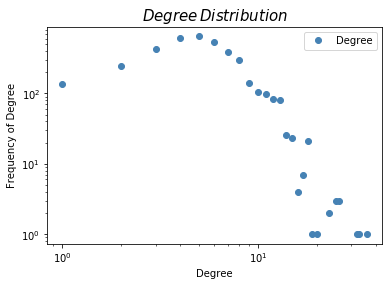

In [54]:
plotDegreeDistribution(G1)

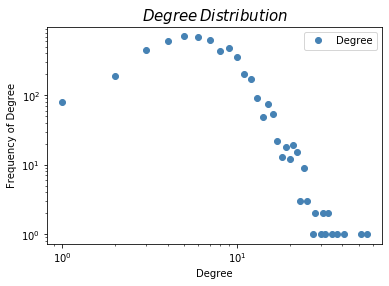

In [55]:
plotDegreeDistribution(G2)

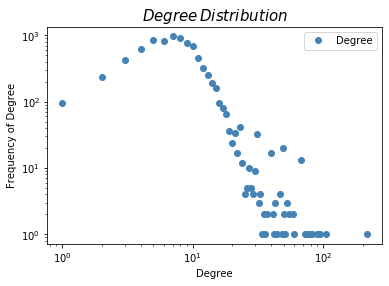

In [56]:
plotDegreeDistribution(G3)

### Co-Authorship Network Visualization

In [61]:
# Visualize Co-Authorship Network

def co_author_network_vis(G):

    G = G     # Plot it
    options = {'node_color': 'black','node_size': 1.5,'width': 0.5}

    nx.draw(G, **options)
    #plt.savefig(name)
    plt.show()

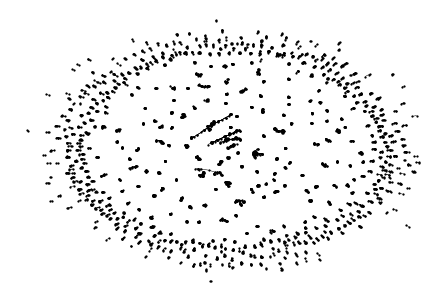

In [62]:
#Visualization 2005-2009
co_author_network_vis(G1)

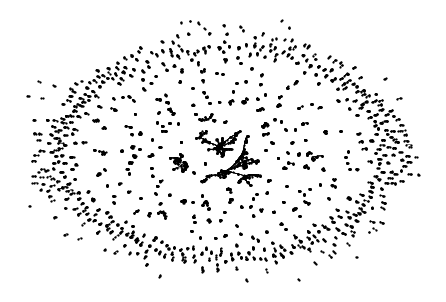

In [63]:
#Visualization 2010-2014
co_author_network_vis(G2)

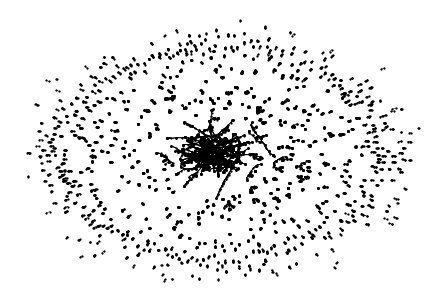

In [64]:
#Visualization 2014-2015
co_author_network_vis(G3)
